Training Isolation Forest model...
Making predictions...
Actual anomalies in the dataset: 6971
Predicted anomalies by the Isolation Forest model: 6824


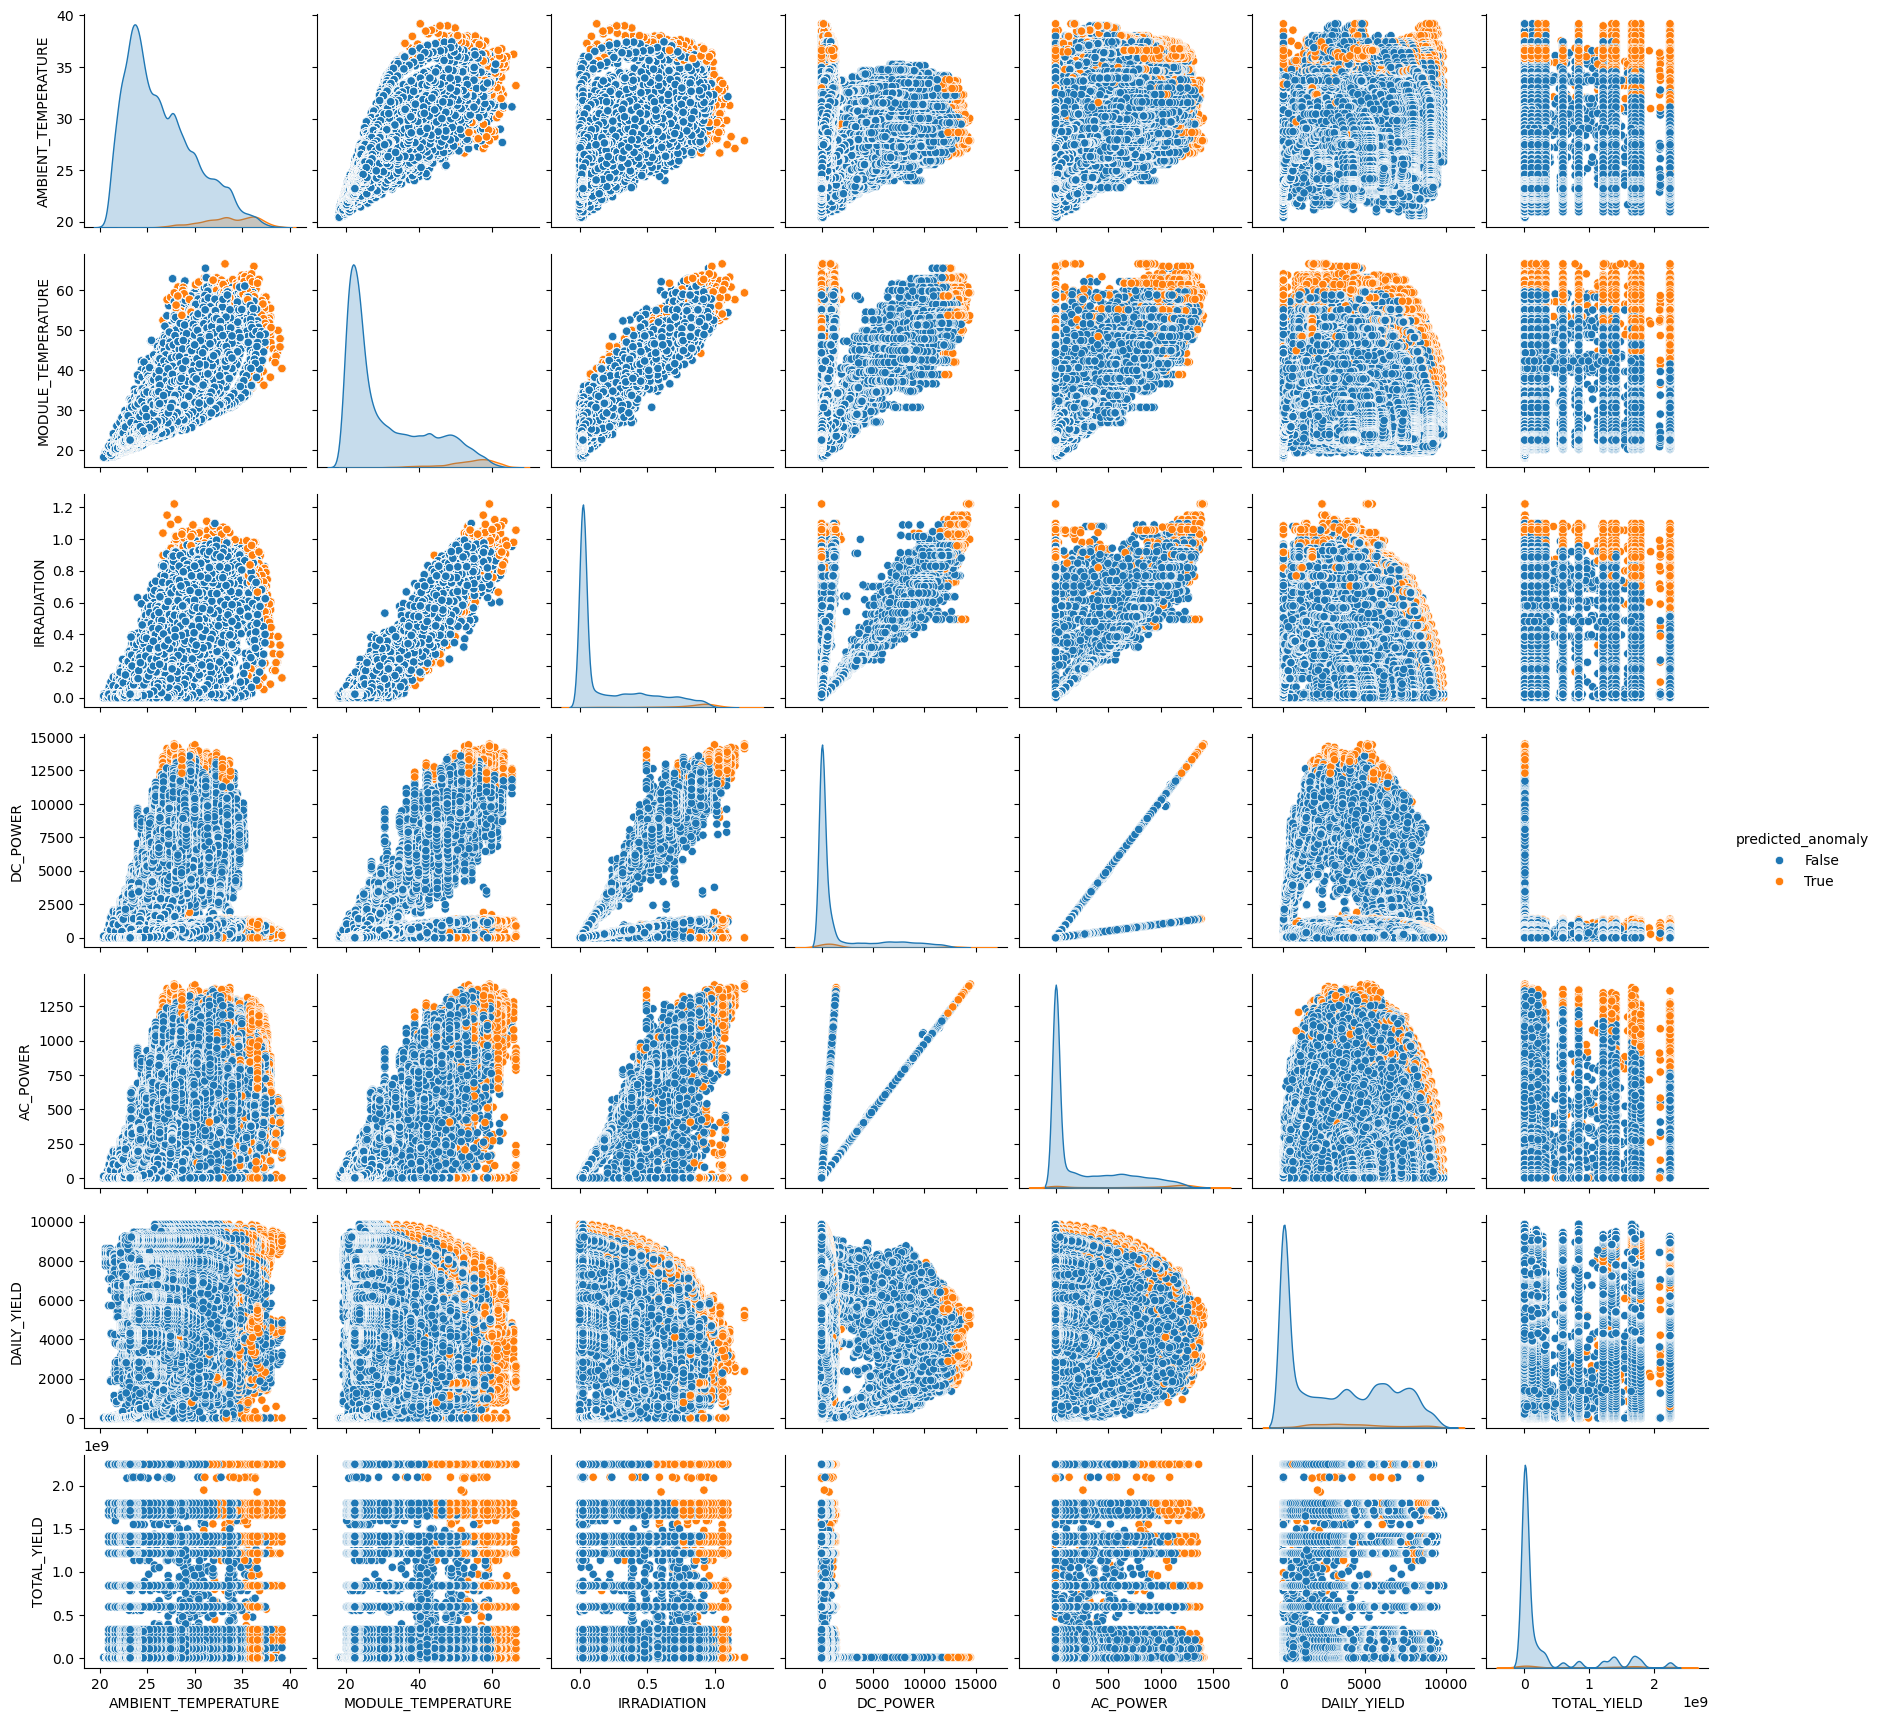

Anomaly detection complete! Results saved to 'anomalies_with_predictions.csv'.


In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm  # Import tqdm for progress bar
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV file containing the dataset with anomalies
data = pd.read_csv('anomalies_detected.csv')

# 2. Feature Selection
# Use relevant features for anomaly detection. In this case, we are using numerical features like:
# 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
X = data[features]

# 3. Data Preprocessing with progress bar for scaling the data
# Standardize the features (important for models like Isolation Forest)
scaler = StandardScaler()

# Wrap the scaling operation with tqdm to show progress
X_scaled = scaler.fit_transform(X)

# 4. Train the Isolation Forest Model with progress bar
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Wrap the training operation with tqdm to show progress
print("Training Isolation Forest model...")
iso_forest.fit(X_scaled)

# 5. Make Predictions with progress bar
# Wrap the prediction operation with tqdm to show progress
print("Making predictions...")
predictions = iso_forest.predict(X_scaled)

# 6. Add predictions to the dataset
data['predicted_anomaly'] = predictions
data['predicted_anomaly'] = data['predicted_anomaly'].map({-1: True, 1: False})

# 7. Evaluate the Model
actual_anomalies = data['any_anomaly'].sum()  # True anomalies from the dataset
predicted_anomalies = data['predicted_anomaly'].sum()  # Predicted anomalies from the model

print(f"Actual anomalies in the dataset: {actual_anomalies}")
print(f"Predicted anomalies by the Isolation Forest model: {predicted_anomalies}")

# 8. Visualize the Results
sns.pairplot(data, hue='predicted_anomaly', vars=features)
plt.show()

# Optionally, save the results (predictions) to a new CSV file
data.to_csv('anomalies_with_predictions.csv', index=False)

print("Anomaly detection complete! Results saved to 'anomalies_with_predictions.csv'.")
